# Inaugural Project

In [11]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from inauguralproject import EdgeworthBoxClass 
from inauguralproject import PointPlotter
from inauguralproject import ErrorMarketClass
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1

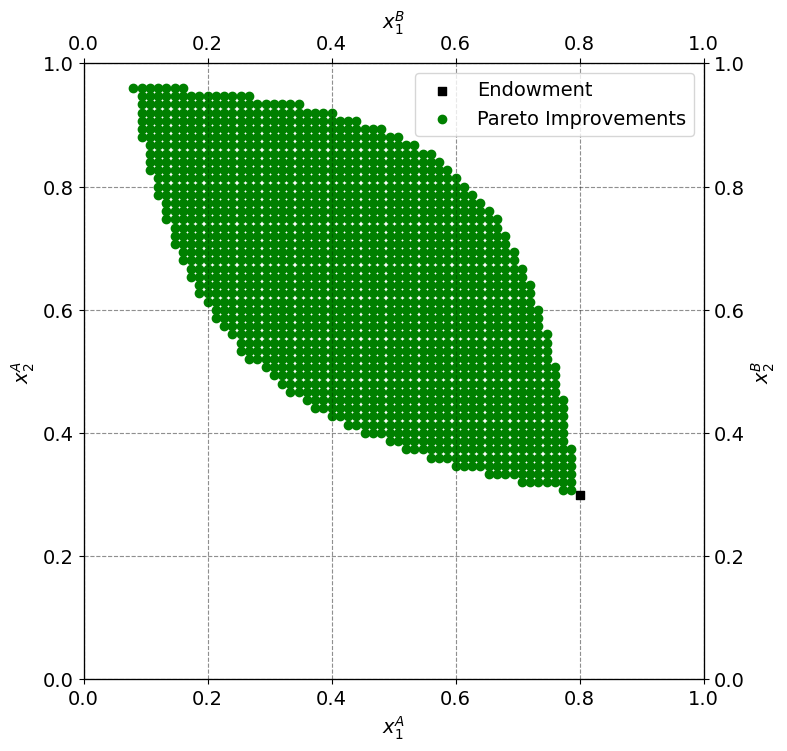

In [12]:
# The code for solving the model is in the class below
alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]

box = EdgeworthBoxClass(alpha, beta, endowment_A)

# The Edgeworth box with Pareto improvements for the set C
box.plot_edgeworth_box()

# Question 2

Explain your code and procedure

In [13]:
# We create a variable for the class
errormarket = ErrorMarketClass()

# We solve the 
result = errormarket.check_market_clearing()

# We rint the errors in the market clearing condition
print("Errors in the market clearing condition:")
for eps1, eps2 in result:
    print(f"Error 1: {eps1}, Error 2: {eps2}")


Errors in the market clearing condition:
Error 1: 0.53, Error 2: -0.27
Error 1: 0.48, Error 2: -0.25
Error 1: 0.42, Error 2: -0.23
Error 1: 0.38, Error 2: -0.22
Error 1: 0.33, Error 2: -0.2
Error 1: 0.29, Error 2: -0.19
Error 1: 0.26, Error 2: -0.17
Error 1: 0.23, Error 2: -0.15
Error 1: 0.19, Error 2: -0.14
Error 1: 0.17, Error 2: -0.12
Error 1: 0.14, Error 2: -0.11
Error 1: 0.11, Error 2: -0.09
Error 1: 0.09, Error 2: -0.07
Error 1: 0.07, Error 2: -0.06
Error 1: 0.05, Error 2: -0.04
Error 1: 0.03, Error 2: -0.03
Error 1: 0.01, Error 2: -0.01
Error 1: -0.01, Error 2: 0.01
Error 1: -0.02, Error 2: 0.02
Error 1: -0.04, Error 2: 0.04
Error 1: -0.05, Error 2: 0.05
Error 1: -0.07, Error 2: 0.07
Error 1: -0.08, Error 2: 0.09
Error 1: -0.09, Error 2: 0.1
Error 1: -0.1, Error 2: 0.12
Error 1: -0.11, Error 2: 0.13
Error 1: -0.13, Error 2: 0.15
Error 1: -0.14, Error 2: 0.17
Error 1: -0.15, Error 2: 0.18
Error 1: -0.15, Error 2: 0.2
Error 1: -0.16, Error 2: 0.21
Error 1: -0.17, Error 2: 0.23
Err

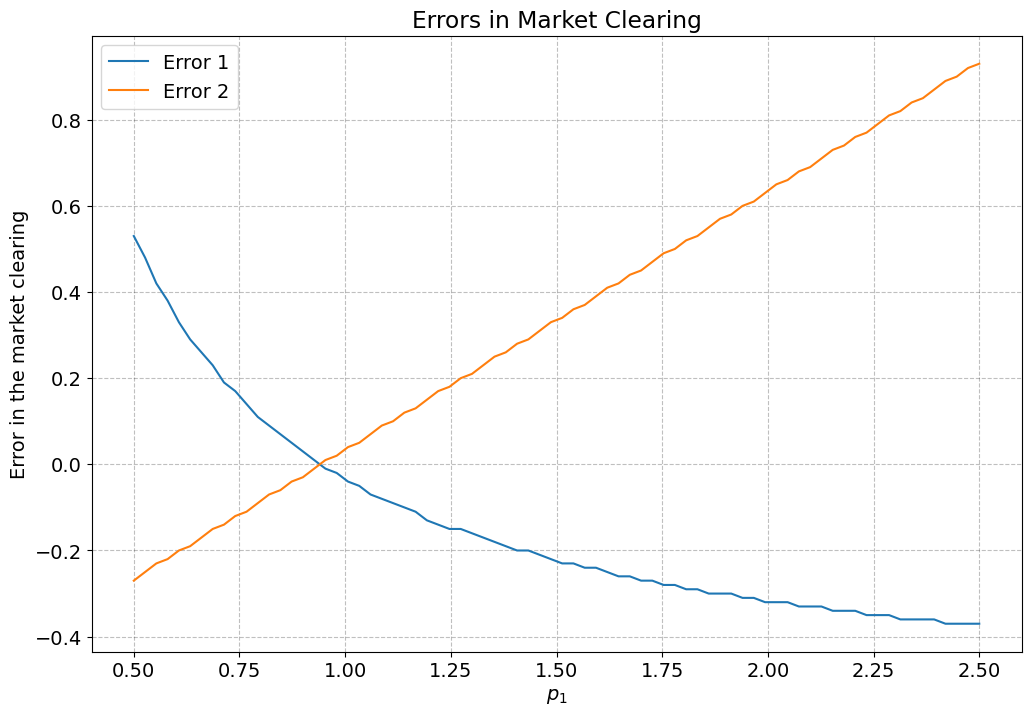

In [14]:
# List to store errors
error1 = []
error2 = []

# Iterate over the result and append errors
for eps1, eps2 in result:
 error1.append(eps1)
 error2.append(eps2)

# Plotting errors
plt.figure(figsize=(12, 8))
plt.plot(errormarket.rho1, error1, label='Error 1')
plt.plot(errormarket.rho1, error2, label='Error 2')
plt.xlabel('$p_1$')
plt.ylabel('Error in the market clearing')
plt.title('Errors in Market Clearing')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

# Question 3

For question 3, we should find the market clearing price

In [15]:
# Create an instance of the class with given parameters
#
alpha = 1/3

#
beta = 2/3

#
endowment_A = [0.8, 0.3]

#
box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Market clearing price
p1_clear = box.market_clearing_price()

#
print(f'The market clearing price for good 1 is given by: {p1_clear:.2f}')

The market clearing price for good 1 is given by: 0.94


In [16]:
p_clearing = 0.944
p2 = 1
omega1 = 0.8
omega2 = 0.3

x1A = alpha * (p_clearing * omega1 + p2*omega2)/p_clearing

x2A = (1-alpha)*((p_clearing*omega1 + p2 * omega2)/p_clearing)

print(round(x1A,2))
print(round(x2A,2))

0.37
0.75


# Question 4a

In [17]:
model = ErrorMarketClass()

N = 75
rho1= [0.5 + 2 * i / N for i in range(N + 1)]

max_utility_A = float('-inf')
optimal_price_A = None

# Iterate over possible prices
for p1 in rho1:
    # Check if price is positive
    if p1 > 0:
        xB1, xB2 = model.demand_B(p1)
        if 1 - xB1 > 0 and 1 - xB2 > 0:
            utility_A = model.utility_A(1 - xB1, 1 - xB2)
            if utility_A > max_utility_A:
                max_utility_A = utility_A
                optimal_price_A = p1

# If optimal price is found, proceed with calculations
if optimal_price_A is not None:
    # Calculate the demand for consumer B using the optimal price for consumer A
    optimal_xB1, optimal_xB2 = model.demand_B(optimal_price_A)

    # Calculate the demand for consumer A using the optimal price to find the optimal allocation
    optimal_xA1, optimal_xA2 = model.demand_A(optimal_price_A)

    #
    allocation_A1 = (1 - model.demand_B(optimal_price_A)[0])
    
    #
    allocation_A2 = (1 - model.demand_B(optimal_price_A)[1])

    # Calculate the utility for consumer B
    utility_B = model.utility_B(optimal_xB1, optimal_xB2)

    #
    print(f"Optimal price for consumer A: {optimal_price_A:.4f}")
    #
    print(f"Allocation for consumer A: x1A = {allocation_A1:.3f}, x2A = {allocation_A2:.4f}")
    #
    print(f"Utility for consumer A: {max_utility_A:.4f}")
    #
    print(f"Utility for consumer B: {utility_B:.4f}")

Optimal price for consumer A: 1.8867
Allocation for consumer A: x1A = 0.619, x2A = 0.6409
Utility for consumer A: 0.6336
Utility for consumer B: 0.3734


# Question 4b

In [18]:
# Define the negative utility function to maximize
def negative_utility_A(p1):
    if p1 <= 0:
        return float('inf')  # Return positive infinity to avoid p1 being zero
    # Calculate the negative utility
    return -model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])

# Set bounds for the optimization
bounds = (1e-6, 10)  # Minimum bound for p1 is 1e-6

# Find the minimum of the negative utility function within the specified bounds
result = minimize_scalar(negative_utility_A, bounds=bounds)

# Check if optimization was successful
if result.success:
    max_utility_A_4b = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
    optimal_p1 = result.x
else:
    print("Optimization failed:", result.message)

#
x1A = (1-model.demand_B(optimal_p1)[0])
#
x2A = (1-model.demand_B(optimal_p1)[1])

#
utility_B_4b = model.utility_B(1-x1A, 1-x2A)

#
print(f"Optimal price for consumer A: {optimal_p1:.4f}")
#
print(f"Allocation for consumer A: x1A = {x1A:.3f}, x2A = {x2A:.4f}")
#
print(f"Utility for consumer A: {max_utility_A_4b:.4f}")
#
print(f"Utility for consumer B: {utility_B_4b:.4f}")

Optimal price for consumer A: 1.8993
Allocation for consumer A: x1A = 0.621, x2A = 0.6400
Utility for consumer A: 0.6336
Utility for consumer B: 0.3726


# Question 5a

Find the allocation if the choice set is restricted to C



In [20]:
import numpy as np

# Define initial endowments
w1A = 0.8 
w2A = 0.3
w1B = 1-w1A
w2B = 1-w2A
# Initialize an empty list to store valid combinations
list = []

# Define the utility with initial endowment
uA_0 = model.utility_A(w1A, w2A)
uB_0 = model.utility_B(w1B, w2B)

# Loop through possible combinations of x_A1 and x_A2
for xA1 in np.linspace(0, 1, N + 1):
    for xA2 in np.linspace(0, 1, N + 1):
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Compute utility for consumers A and B
        uA = model.utility_A(xA1, xA2)
        uB = model.utility_B(xB1, xB2)
        
        # Check if the combination satisfies initial conditions
        if uA >= uA_0 and uB >= uB_0:
            list.append((xA1, xA2))

# Initialize variables to track optimal allocation and utility
uA_C = -np.inf
xA1_C = np.nan
xA2_C = np.nan

# Find the allocation with the highest utility for consumer A within constraint set C
for xA1, xA2 in list:
    if model.utility_A(xA1, xA2) > uA_C:
        uA_C = model.utility_A(xA1, xA2)
        xA1_C = xA1
        xA2_C = xA2


print(f"Allocation for consumer A: x1A = {xA1_C:.3f}, x2A = {xA2_C:.4f}")
#
print(f"Utility for consumer A: {uA_C:.4f}")
#

Allocation for consumer A: x1A = 0.560, x2A = 0.8533
Utility for consumer A: 0.7416


# Question 5b

In [ ]:
# Define the negative utility function to maximize
def negative_utility_A(x):
    xA1, xA2 = x 
    return -model.utility_A(xA1, xA2)

# Define the constraint
def constraint_func(x):
    xA1, xA2 = x
    return model.utility_B(1-xA1,1-xA2) - model.utility_B(w1B, w2B)

# Define the bounds for x1A and x2A
bounds = [[0, 1], [0, 1]] 

# defining the initial guess based on 5a
initial_guess = [0.560, 0.853]

# setting up the constraint and minimize
constraints = [{'type': 'ineq', 'fun': constraint_func}]
result = minimize(negative_utility_A, initial_guess, bounds=bounds, constraints=constraints)

# Check if it works
if result.success:
    optimal_xA1, optimal_xA2 = result.x
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
else:
    print("Optimization failed:", result.message)
    
xA1_5b = optimal_xA1
xA2_5b = optimal_xA2
uA_5b = max_uA


print(f"Allocation for consumer A: x1A = {xA1_5b:.3f}, x2A = {xA2_5b:.4f}")
#
print(f"Utility for consumer A: {uA_5b:.4f}")
#

Allocation for consumer A: x1A = 0.576, x2A = 0.8444
Utility for consumer A: 0.7432


# Question 6a

In question 6.a and 6.b, the objective function will be maximized by a utilitarian social planner. The objective function becomes:

$$
\begin{aligned}
    \max_{\left(x_1^A, x_2^A\right) \in [0,1] \times [0,1]}{u^A\left(x_1^A, x_2^A\right) + u^B\left(1 - x_1^A, 1 - x_2^A\right)}
\end{aligned}
$$

In [ ]:
# 1. We create an instance of the class in the inauguralproject.py-file
x1_opt_socialplanner,x2_opt_socialplanner = box.SocialPlanner()

The utilitarian social planner chooses the allocation for consumer A: (x1A, x2A) = (0.33,0.67)
Utility of consumer A at this allocation is 0.53, and the utility for consumer B is 0.53
The aggregated utility becomes 1.06


# Question 6b

For question 6.b, we should illustrate our previous results and compare them to eachother. We do this by illustrating them in the Edgeworth box. 

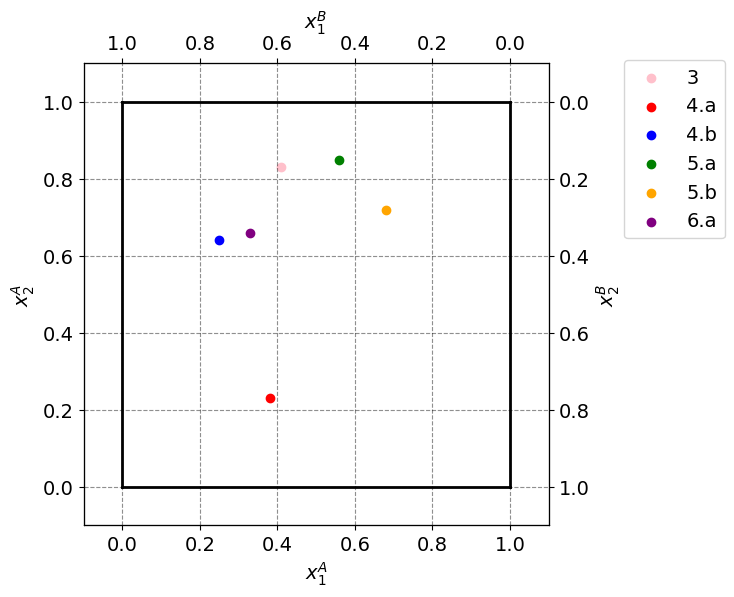

In [ ]:
# 1. We set the points from the 
previous_results = [(0.41, 0.83),
          (0.38, 0.23),
          (0.25, 0.64),
          (0.56, 0.85),
          (0.68, 0.72),
          (0.33, 0.66)]

# 2. Set the labels for the points
labels_for_points = ['3', '4.a', '4.b', '5.a', '5.b', '6.a']

# 3. Set the colors for the points
colors = ['pink', 'red', 'blue', 'green', 'orange', 'purple']

# 4. Creates an instance of the PointPlotter class
plot_of_previous_results = PointPlotter(previous_results, labels_for_points, colors)

# 5. Generates the plot
plot_of_previous_results.plot_the_previous_results()

In the figure above, we can see the previous results in question 4.a, 4.b, 5.a, 5.b, and 6.a in an Edgeworth Box.

Maximizing total welfare will be socially benefinicial from the view of a social planner rather than only maximizing the utility of consumer A. However, this will reduce the utility for this consumer, making him more worse off than in question 4.

# Question 7

In this question, we should draw a set with 50 elements based on this equation:

$$
\begin{aligned}
    \mathcal{W} = \left\{\left(\omega_1^A, \omega_2^A\right) \mid \omega_1^A \sim \mathcal{U}(0,1), \omega_2^A \sim \mathcal{U}(0,1) \right\}
\end{aligned}
$$

Element 1: (0.61, 0.53)
Element 2: (0.19, 0.59)
Element 3: (0.53, 0.57)
Element 4: (0.62, 0.04)
Element 5: (0.00, 0.85)
Element 6: (0.47, 0.86)
Element 7: (0.12, 0.32)
Element 8: (0.07, 0.92)
Element 9: (0.83, 0.27)
Element 10: (0.32, 0.70)
Element 11: (0.70, 0.60)
Element 12: (0.42, 0.67)
Element 13: (0.22, 0.20)
Element 14: (0.05, 0.24)
Element 15: (0.52, 0.42)
Element 16: (0.29, 0.23)
Element 17: (0.21, 0.70)
Element 18: (0.55, 0.15)
Element 19: (0.17, 0.10)
Element 20: (0.04, 0.84)
Element 21: (0.85, 0.18)
Element 22: (0.83, 0.29)
Element 23: (0.93, 0.20)
Element 24: (0.70, 0.80)
Element 25: (0.40, 0.63)
Element 26: (0.76, 0.96)
Element 27: (0.50, 0.90)
Element 28: (0.09, 0.50)
Element 29: (0.15, 0.65)
Element 30: (0.06, 0.00)
Element 31: (0.84, 0.19)
Element 32: (0.51, 0.67)
Element 33: (0.42, 0.35)
Element 34: (0.40, 0.60)
Element 35: (0.18, 0.82)
Element 36: (0.60, 0.99)
Element 37: (0.08, 0.43)
Element 38: (0.93, 0.64)
Element 39: (0.28, 0.23)
Element 40: (0.98, 0.65)
Element 4

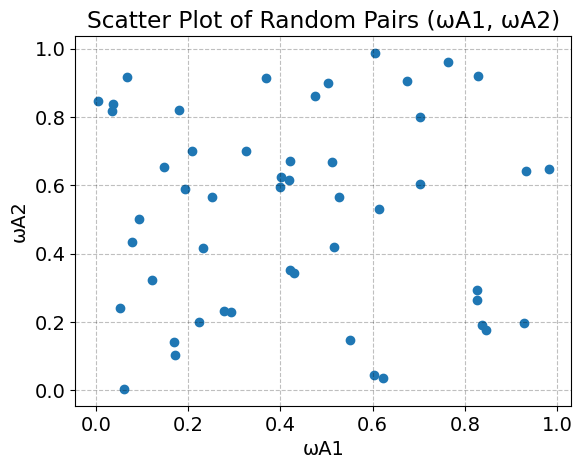

In [ ]:
#
random_endowments = EdgeworthBoxClass(alpha, beta, endowment_A, num_pairs=50)

#
random_endowments.generate_random_endowments()

#
random_endowments.print_random_endowments()

#
random_endowments.plot_random_endowments()

# Question 8


In this question, we should find the market equilibrium allocation for all of the endowment sets. 

In [ ]:

# We generate random set W with 50 elements
np.random.seed(42)
n = 50
wA1 = np.random.uniform(0, 1, n)
wA2 = np.random.uniform(0, 1, n)
p1 = np.linspace(0.5, 2.5, n)
wB1 = 1-wA1
wB2 = 1-wA2

# We create a function Function to calculate optimal allocation for given omega_A1 and omega_A2
def set_of_optimal_allocations(wA1, wA2, alpha=1/3, p2=1):
    xA1 = alpha * (p1 * wA1 + p2 * wA2) / p1
    xA2 = (1 - alpha) * (p1 * wA1 + p2 * wA2) / p2
    return xA1, xA2

# We use a list iteration in order to calculate the optimal allocations for each omega in the total endowments set, W
allocations = np.array([set_of_optimal_allocations(wA1, wA2) for wA1, wA2 in zip(wA1, wA2)])

print("The prices for good 1 are the following:", p1)
print("The optimal allocations are the following:", allocations)

# Plot the Edgeworth box with Pareto improvements
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("$x_1^A$") # setting x-axis label
ax.set_ylabel("$x_2^A$") # setting y-axis label
# Setting the limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Plotting endowment points
ax.scatter(wA1, wA2, marker='s', color='black', label='Endowment A')
ax.scatter(wB1, wB2, marker='s', color='red', label='Endowment B')

ax.legend() # We add legend
plt.show() # We display the plot

NameError: name 'np' is not defined

Conclusion